# **1. Perkenalan Dataset**


Sumber Dataset: Dataset ini diperoleh dari Kaggle (Loan Prediction Dataset). Dataset ini merupakan data publik yang sering digunakan untuk memecahkan masalah klasifikasi dalam menentukan kelayakan kredit nasabah.

Deskripsi Dataset: Dataset ini berisi informasi profil nasabah yang mengajukan pinjaman. Terdiri dari 614 baris dan 13 kolom dengan rincian fitur sebagai berikut:

Loan_ID: Identitas unik pengajuan pinjaman.

Gender: Jenis kelamin (Male/Female).

Married: Status pernikahan (Yes/No).

Dependents: Jumlah tanggungan (0, 1, 2, 3+).

Education: Pendidikan (Graduate/Not Graduate).

Self_Employed: Wiraswasta (Yes/No).

ApplicantIncome: Pendapatan pokok pemohon.

CoapplicantIncome: Pendapatan pendamping/pasangan.

LoanAmount: Jumlah pinjaman (dalam ribuan).

Loan_Amount_Term: Jangka waktu pinjaman (dalam bulan).

Credit_History: Riwayat kredit (1: Baik, 0: Buruk).

Property_Area: Area properti (Urban/Semiurban/Rural).

Loan_Status: Status persetujuan pinjaman (Y/N) - Variabel Target.

Tujuan Proyek: Tujuan utama dari proyek ini adalah melakukan pembersihan data (preprocessing), analisis data eksploratif (EDA), dan membangun model klasifikasi untuk memprediksi apakah seorang nasabah layak mendapatkan pinjaman (Loan_Status) berdasarkan data profil yang tersedia

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Mengatur tampilan visualisasi
sns.set(style="whitegrid")

# Mengabaikan pesan warning agar output bersih
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil di-import!")

Library berhasil di-import!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Lokasi File Dataset
# GANTI path di bawah ini dengan cara:
# Klik ikon Folder (kiri) -> drive -> MyDrive -> Cari file train.csv -> Klik Kanan "Copy path"
file_path = '/content/drive/MyDrive/Tugas Membangun Sistem Machine Learning/train.csv'

# 3. Memuat Data
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print("\n5 Baris Teratas Data:")
    display(df.head())

    print("\nInformasi Tipe Data:")
    df.info()
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di: {file_path}")
    print("Mohon cek kembali path file di Google Drive Anda.")

Mounted at /content/drive
Dataset berhasil dimuat!

5 Baris Teratas Data:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah Missing Values per Kolom:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


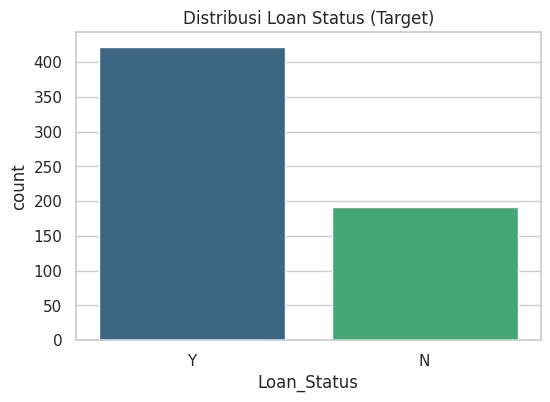

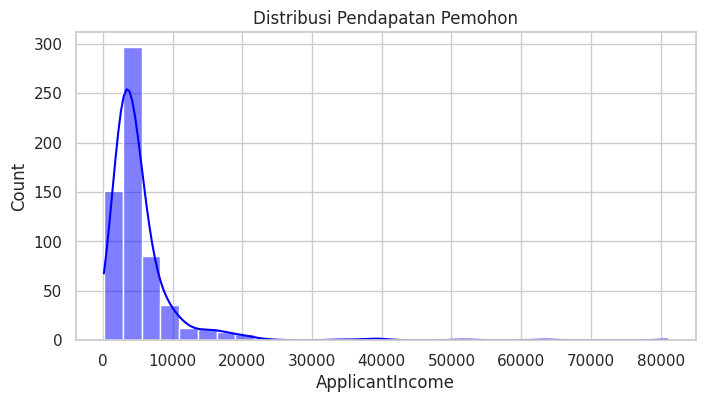

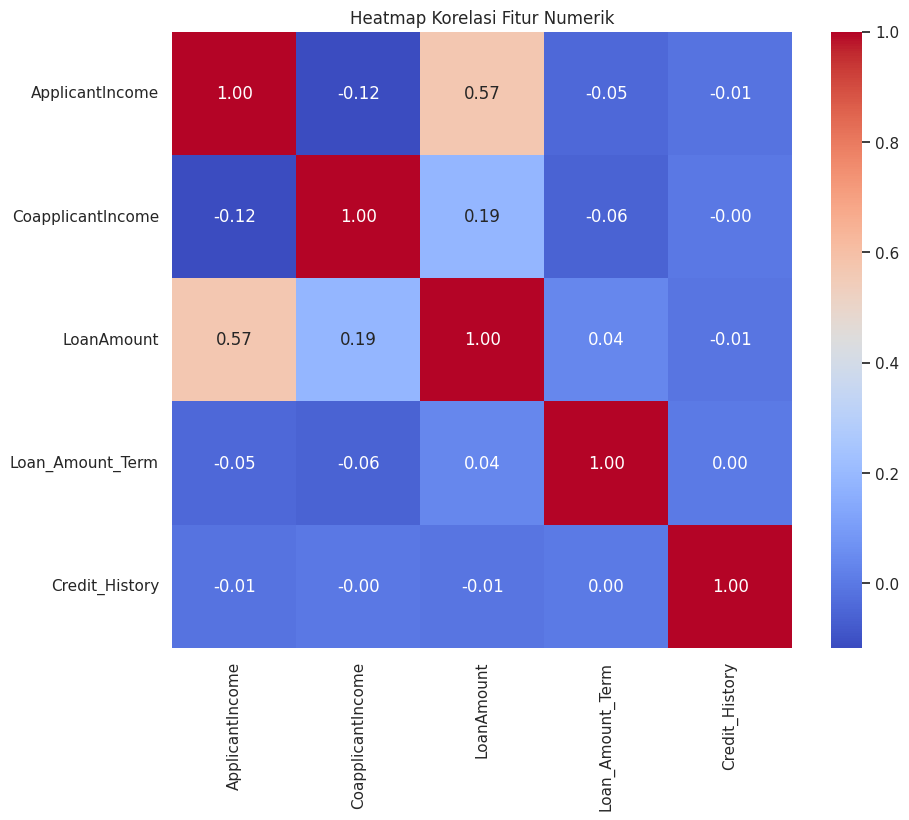

In [ ]:
# 1. Cek Missing Values (Nilai Kosong)
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# 2. Visualisasi Target Variable (Loan_Status)
# Tujuannya melihat keseimbangan kelas (Y/N)
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='viridis')
plt.title('Distribusi Loan Status (Target)')
plt.show()

# 3. Visualisasi Distribusi Numerik (Contoh: ApplicantIncome)
# Melihat apakah ada outlier atau skewness
plt.figure(figsize=(8, 4))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Distribusi Pendapatan Pemohon')
plt.show()

# 4. Korelasi Fitur Numerik (Heatmap)
# Melihat hubungan antar variabel angka
plt.figure(figsize=(10, 8))
# Hanya mengambil kolom angka untuk korelasi
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:


import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- STEP 1: Mengisi Nilai Kosong ---
df_clean = df.copy()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df_clean['LoanAmount'] = df_clean['LoanAmount'].fillna(df_clean['LoanAmount'].median())
df_clean['Loan_Amount_Term'] = df_clean['Loan_Amount_Term'].fillna(df_clean['Loan_Amount_Term'].median())

#  STEP 2: Membersihkan Kolom
if 'Loan_ID' in df_clean.columns:
    df_clean.drop('Loan_ID', axis=1, inplace=True)
df_clean['Dependents'] = df_clean['Dependents'].replace('3+', '3')

# --- STEP 3: Mengubah Teks ke Angka (Encoding) ---
le = LabelEncoder()
df_clean['Loan_Status'] = le.fit_transform(df_clean['Loan_Status'])
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# --- STEP 4: Pensaklaran (Mendefinisikan X_scaled dan y) ---
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status'] # Ini mendefinisikan 'y' yang tadi error

scaler = StandardScaler()
# Ini mendefinisikan 'X_scaled' yang tadi error
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --- STEP 5: Export ke CSV ---
# Gunakan folder utama, bukan path file
output_folder = '/content/drive/MyDrive/Tugas Membangun Sistem Machine Learning'
output_file_name = 'train_clean.csv'
output_path = os.path.join(output_folder, output_file_name)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

df_clean_final = X_scaled.copy()
df_clean_final['Loan_Status_Target'] = y.values
df_clean_final.to_csv(output_path, index=False)

print(f" BERHASIL! File disimpan di: {output_path}")

 BERHASIL! File disimpan di: /content/drive/MyDrive/Tugas Membangun Sistem Machine Learning/train_clean.csv
